In [1]:
import utide

print(utide.__version__)

0.1b0.dev0


In [2]:
import numpy as np

def fake_tide(t, M2amp, M2phase):
    """
    Generate a minimally realistic-looking fake semidiurnal tide.
    
    t is time in hours
    phases are in radians
    
    Modified from: http://currents.soest.hawaii.edu/ocn760_4/_static/plotting.html
    """
    return M2amp * np.sin(2 * np.pi * t / 12.42 - M2phase)

In [3]:
from pandas import date_range

N = 500
amp, phase = 2, 0

t = date_range(start='2016-03-29', periods=N, freq='H')

# Signal + some noise.
u = fake_tide(np.arange(N), M2amp=2, M2phase=0) + np.random.randn(N)
v = fake_tide(np.arange(N), M2amp=1, M2phase=np.pi) + np.random.randn(N)

In [4]:
from matplotlib.dates import date2num

time = date2num(t.to_pydatetime())

In [5]:
from utide import solve

coef = solve(time, u, v,
             lat=-42.5,
             nodal=False,
             trend=False,
             method='ols',
             conf_int='linear',
             Rayleigh_min=0.95,)

solve: 
matrix prep ... 
Solution ...
diagnostics...
Done.



In [6]:
from utide import reconstruct

tide = reconstruct(time, coef)

reconstruct:
prep/calcs...
Done.



In [7]:
tide.keys()

['u', 'v']

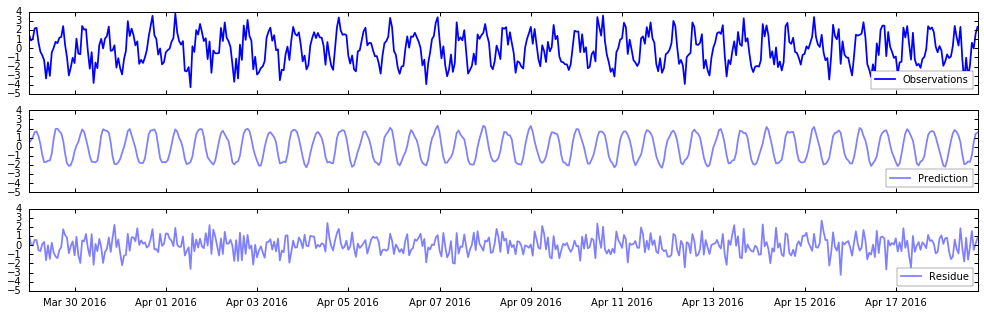

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-notebook')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(t, u, label=u'Observations')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(t, tide['u'], alpha=0.5, label=u'Prediction')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(t, u-tide['u'], alpha=0.5, label=u'Residue')
_ = ax2.legend(numpoints=1, loc='lower right')

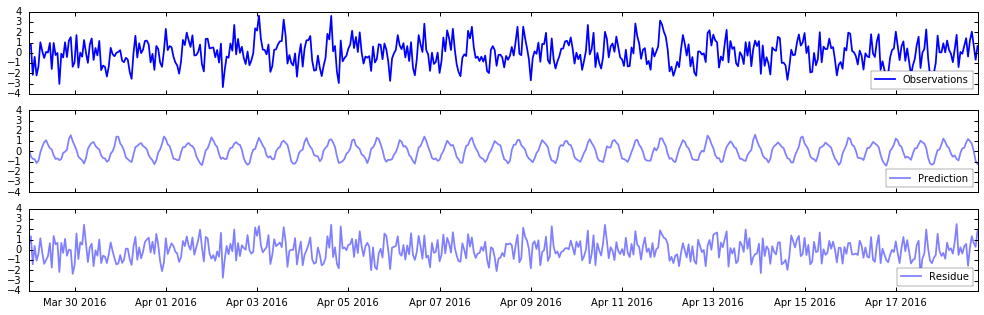

In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(17, 5))

ax0.plot(t, v, label=u'Observations')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(t, tide['v'], alpha=0.5, label=u'Prediction')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(t, v-tide['v'], alpha=0.5, label=u'Residue')
_ = ax2.legend(numpoints=1, loc='lower right')